# K-Nearest Neighbours

This file classifies the dataset using KNN algorithm. The following file includes finding the process of finding the optimal K value as well as feature selection using ANOVA.

In [46]:
import numpy as np
import pandas as pd
import sklearn

In [47]:
# Read csv file
data = pd.read_csv("frogs_mfcc.csv")
data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,ScinaxRuber


### Data visualization

### Transforming data

This code snippet transform the species data into numbers.

In [48]:
from sklearn import preprocessing

# Modify the attributes to integers, because some attributes are not integers
obj = preprocessing.LabelEncoder()
species = obj.fit_transform(list(data["Species"]))
species

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

The code snippet down below defines the x and y data, in which x are the features and y are the target datas.

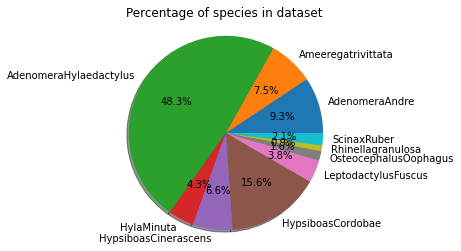

In [49]:
import matplotlib.pyplot as plt

names = list(data["Species"].unique())
sizes = [data["Species"].value_counts()[unique_class]*100/len(data["Species"]) for unique_class in names]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=names, autopct="%1.1f%%", shadow=True)
plt.title("Percentage of species in dataset")
plt.axis("equal")
plt.savefig("species_percentage.png")
plt.show()

In [50]:
# Specify the featuyres (x) and the result (y)
predict = "Species"

X = data.drop([predict], axis=1)
y = list(species)

The most influencial feature is: MFCCs_13


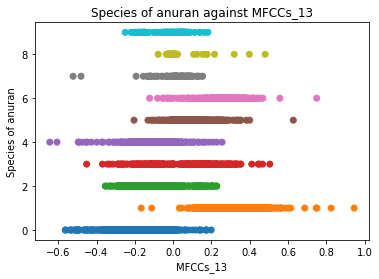

In [51]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the one feature that is the most influencial in the dataset
feature_selection = SelectKBest(score_func=f_classif,k=1)
selected_feature = feature_selection.fit_transform(X, y)

# Get the most influencial feature index
feature_index = [i for i, x in enumerate(feature_selection.get_support()) if x]
# Get the name of the most influencial feature based on the index
feature_name = data.columns[feature_index[0]]
print("The most influencial feature is:", feature_name)

# Since each y value represents it's own category, the color will be mapped to change according to y
colormap = np.array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.scatter(x=selected_feature, y=y, c=colormap[y])
plt.xlabel(feature_name)
plt.title("Species of anuran against MFCCs_13")
plt.ylabel("Species of anuran")
plt.savefig("feature_graph.png")
plt.show()


### Feature Selection

In this case, we used ANOVA feature selection method to select our features. This is because ANOVA feature selection works well with numerical input, but categorical output. We chose to have a maximum of 9 features selected is because after testing, we found out that roughly 9 to 11 features produces the best accuracy for our model.

#### Reference
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/ 

In [52]:
from sklearn.feature_selection import SelectKBest, f_classif

X = data.drop([predict], axis=1)
y = list(species)

# Define the feature selection class using ANOVA F measure.
feature_selection = SelectKBest(score_func=f_classif, k=9)
# Update the variable X with the selected features
X = feature_selection.fit_transform(X, y)
feature_index = [i for i, x in enumerate(feature_selection.get_support()) if x]
feature_name = []
for i in feature_index:
    feature_name.append(data.columns[i])
feature_name

['MFCCs_ 7',
 'MFCCs_ 9',
 'MFCCs_11',
 'MFCCs_12',
 'MFCCs_13',
 'MFCCs_14',
 'MFCCs_15',
 'MFCCs_17',
 'MFCCs_22']

In [53]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

### Finding the optimal k value

To find the optimal k value, we determined the error rate for a range of k values from 1 to 39. After that, we plotted a graph to visualize the data.

Two graphs were plotted
1. Error rate against k 
2. Accuracy against k

From the graphs generated, we can see that the model performs best when the k value is 1

Minimum error:  0.03127171646977067  at K = 1


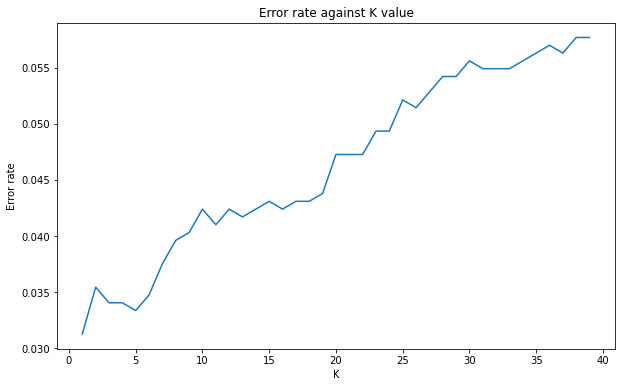

In [54]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate)
plt.title("Error rate against K value")
plt.xlabel("K")
plt.ylabel("Error rate")
plt.savefig("error_rate_against_k.png")
print("Minimum error: ", min(error_rate), " at K =", error_rate.index(min(error_rate))+1)

Maximum accuracy:  0.9687282835302293  at K = 1


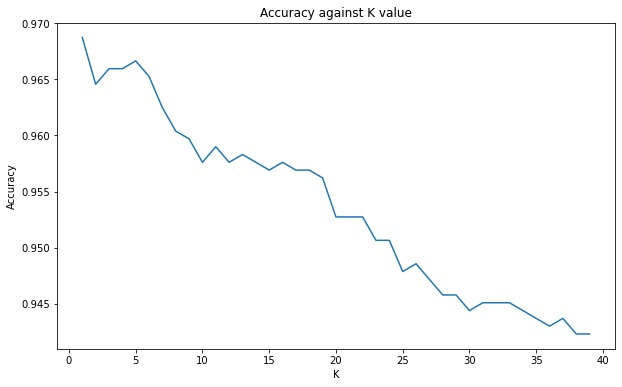

In [55]:
from sklearn import metrics

k_accuracy = []
for i in range(1, 40):
    neighbors = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    yhat = neighbors.predict(X_test)
    k_accuracy.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), k_accuracy)
plt.title("Accuracy against K value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.savefig("accuracy_against_k")
print("Maximum accuracy: ", max(k_accuracy), " at K =", k_accuracy.index(max(k_accuracy))+1)

### Training and predicting with the model

After finding the optimal k value, we can now start training the model with the optimal k value from the previous part.

After that, we will perform predictions with the model.

In [56]:
model = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate))+1)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

### Model report

This code snippet prints the classification report as well as the confusion matrix of the KNN model.

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       135
           1       0.99      1.00      0.99       694
           2       0.96      0.99      0.98       102
           3       0.95      0.86      0.90        65
           4       0.97      0.95      0.96        96
           5       0.97      0.96      0.96       235
           6       0.94      0.94      0.94        54
           7       0.73      0.65      0.69        17
           8       0.88      0.93      0.90        15
           9       0.77      0.88      0.82        26

    accuracy                           0.97      1439
   macro avg       0.91      0.91      0.91      1439
weighted avg       0.97      0.97      0.97      1439

[[131   0   0   1   0   0   0   0   0   3]
 [  0 691   0   1   1   1   0   0   0   0]
 [  1   0 101   0   0   0   0   0   0   0]
 [  3   2   2  56   0   2   0   0   0   0]
 [  1   0   0   0  91   0   1   2   0   1]
 [  0   1   1   1   1 225 